In [4]:
import warnings
warnings.filterwarnings("ignore")

from data.yahoodownloader import YahooDownloader
from config.config import TRADE_START_DATE, TRADE_END_DATE
baseline_df = YahooDownloader(start_date=TRADE_START_DATE, 
                              end_date=TRADE_END_DATE, ticker_list=["^DJI"]).fetch_data()
# baseline_df = baseline_df.loc[:693]
len(baseline_df)

[*********************100%***********************]  1 of 1 completed


754

In [5]:
import pandas as pd
asset_value_a2c = pd.read_csv('results/asset_value_a2c.csv',index_col=0)
asset_value_ppo = pd.read_csv('results/asset_value_ppo.csv',index_col=0)
asset_value_ddpg = pd.read_csv('results/asset_value_ddpg.csv',index_col=0)
len(asset_value_a2c)

754

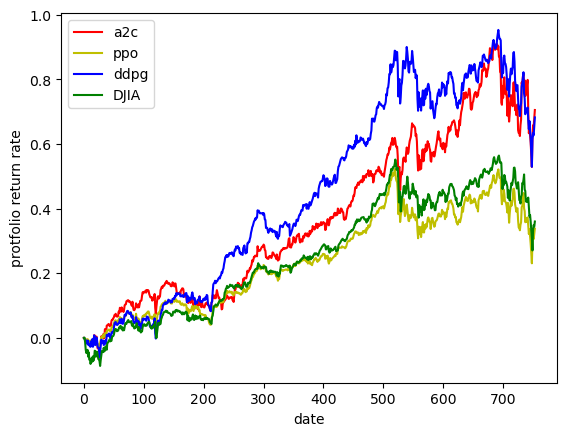

In [6]:
import matplotlib.pyplot as plt
# %matplotlib inline

plt.plot((asset_value_a2c['0'].values+1).cumprod()-1,'r-',label='a2c')
plt.plot((asset_value_ppo['0'].values+1).cumprod()-1,'y-',label='ppo')
plt.plot((asset_value_ddpg['0'].values+1).cumprod()-1,'b-',label='ddpg')
plt.plot(baseline_df.close.values/baseline_df.close[0]-1,'g-',label = 'DJIA')
plt.xlabel('date')
plt.ylabel('protfolio return rate')
plt.legend()
# plt.show()
plt.savefig('results/baselines_nowindow.png')